# **Assignment 2 Karim Aboudaoud 900212779** 

# **Part 2: Covid-19 Cases**

**Abstract**

For this part of the assignment, I chose one country from the data set which is France to analyze its daily reported number of confirmed cases and deaths, and I compared the ratio between confirmed cases and deaths in 2020 and 2021. I plotted the necessary graphs for France such as the confidence interval graphs, line graphs and line graphs with error bars. 

Then, I made a comparison between the data in terms of several factors like regions, income, and continents. 

The chosen regions to compare between each other were East Asia and Pacific, and Europe and Central Asia. 

The chosen income levels to compare between each other were low income and high income. 

The chosen continents to compare between each other were Oceania and North America. 

The analysis for each factor made it easier to understand which countries, regions, continents and which socio economic level were really affected by COVID.  

For each of the above factors I plotted a line graph with error bars to show the comparison between 2020 and 2021 in terms of either confirmed cases or confirmed deaths.  

The description of each graph can be found under the graph.

The conclusion can be found at the end of the notebook. 

**Preparing Data for Manipulation**

In [1]:
import scipy

In [2]:
import numpy as np

In [64]:
!pip install matplotlib

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [11]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [5]:
import scipy.stats 

In [6]:
from scipy.stats import norm,t

In [70]:
!pip3 install livewires

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [7]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [72]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [73]:
df['country'].unique()

In [74]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [75]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

**Chosen country to analyze: France**

In [12]:
dffr=df[df['country']=='France']

Analyzing the daily reported number of cases 

In [13]:
statsfr=dffr.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [123]:
statsfr

dcases 
 
 
 
 mean 
 std 
 size 
 
 
 weekdays 
 
 
 
 
 
 
 
 Fri 
 17148.127451 
 27347.227106 
 102 
 
 
 Sat 
 14975.475248 
 18070.217337 
 101 
 
 
 Sun 
 13456.702970 
 17602.649041 
 101 
 
 
 Mon 
 6090.405941 
 13046.142380 
 101 
 
 
 Tue 
 15780.643564 
 22840.055655 
 101 
 
 
 Wed 
 17793.029703 
 25894.416151 
 101 
 
 
 Thu 
 18558.029703 
 26434.156239 
 101

In [124]:
statsfr.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [126]:
statsfr.columns

MultiIndex([('dcases', 'mean'),
            ('dcases',  'std'),
            ('dcases', 'size')],
           )

In [127]:
statsfr.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [128]:
ci95_hi = []
ci95_lo = []

In [129]:
for i in statsfr.index:
    m, s, n = statsfr.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [130]:
ci95_hi

[22546.158660289526,
 18560.554900435036,
 16949.0184050158,
 8678.723431382872,
 20312.04555423757,
 22930.40811604733,
 23802.49101221734]

In [132]:
ci95_lo

[11750.096241671257,
 11390.39559461447,
 9964.387535578264,
 3502.0884498052474,
 11249.2415744753,
 12655.651289893263,
 13313.568393723253]

In [133]:
statsfr['ci95_hi'] = ci95_hi
statsfr['ci95_lo'] = ci95_lo
print(statsfr)

                dcases                          ci95_hi       ci95_lo
                  mean           std size                            
weekdays                                                             
Fri       17148.127451  27347.227106  102  22546.158660  11750.096242
Sat       14975.475248  18070.217337  101  18560.554900  11390.395595
Sun       13456.702970  17602.649041  101  16949.018405   9964.387536
Mon        6090.405941  13046.142380  101   8678.723431   3502.088450
Tue       15780.643564  22840.055655  101  20312.045554  11249.241574
Wed       17793.029703  25894.416151  101  22930.408116  12655.651290
Thu       18558.029703  26434.156239  101  23802.491012  13313.568394


In [134]:
df_ci= pd.DataFrame(statsfr)

In [135]:
df_ci

dcases 
 ci95_hi 
 ci95_lo 
 
 
 
 mean 
 std 
 size 
 
 
 
 
 weekdays 
 
 
 
 
 
 
 
 
 
 Fri 
 17148.127451 
 27347.227106 
 102 
 22546.158660 
 11750.096242 
 
 
 Sat 
 14975.475248 
 18070.217337 
 101 
 18560.554900 
 11390.395595 
 
 
 Sun 
 13456.702970 
 17602.649041 
 101 
 16949.018405 
 9964.387536 
 
 
 Mon 
 6090.405941 
 13046.142380 
 101 
 8678.723431 
 3502.088450 
 
 
 Tue 
 15780.643564 
 22840.055655 
 101 
 20312.045554 
 11249.241574 
 
 
 Wed 
 17793.029703 
 25894.416151 
 101 
 22930.408116 
 12655.651290 
 
 
 Thu 
 18558.029703 
 26434.156239 
 101 
 23802.491012 
 13313.568394

In [136]:
df_ci.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [137]:
df_ci['weekdays']=df_ci.index

In [138]:
df_ci

dcases 
 ci95_hi 
 ci95_lo 
 weekdays 
 
 
 
 mean 
 std 
 size 
 
 
 
 
 
 weekdays 
 
 
 
 
 
 
 
 
 
 
 Fri 
 17148.127451 
 27347.227106 
 102 
 22546.158660 
 11750.096242 
 Fri 
 
 
 Sat 
 14975.475248 
 18070.217337 
 101 
 18560.554900 
 11390.395595 
 Sat 
 
 
 Sun 
 13456.702970 
 17602.649041 
 101 
 16949.018405 
 9964.387536 
 Sun 
 
 
 Mon 
 6090.405941 
 13046.142380 
 101 
 8678.723431 
 3502.088450 
 Mon 
 
 
 Tue 
 15780.643564 
 22840.055655 
 101 
 20312.045554 
 11249.241574 
 Tue 
 
 
 Wed 
 17793.029703 
 25894.416151 
 101 
 22930.408116 
 12655.651290 
 Wed 
 
 
 Thu 
 18558.029703 
 26434.156239 
 101 
 23802.491012 
 13313.568394 
 Thu

In [139]:
df_ci.columns

MultiIndex([(  'dcases', 'mean'),
            (  'dcases',  'std'),
            (  'dcases', 'size'),
            ( 'ci95_hi',     ''),
            ( 'ci95_lo',     ''),
            ('weekdays',     '')],
           )

In [140]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['weekdays']))

([<matplotlib.axis.YTick at 0x7f9642720370>,
 [Text(0, 0, 'Fri'),
  Text(0, 1, 'Sat'),
  Text(0, 2, 'Sun'),
  Text(0, 3, 'Mon'),
  Text(0, 4, 'Tue'),
  Text(0, 5, 'Wed'),
  Text(0, 6, 'Thu')])

The confidence interval for the daily COVID cases in France shows that there is no certain day that has the most COVID confirmed cases because there are many days that overlap each other. There are some confidence intervals for days that are wider than others, but at the end all days have nearly the same numbers with the difference of the size of the interval. The big size shows that there is a varied probability of getting this certain amount such as for Friday, which is the biggest interval, the interval goes from 12500 to 22500 which is a really high which shows that it is not accurate. Then, if we look at the confidence interval od Monday, it is narrower compared to the rest and this makes it more accurate because the difference between the interval is less which makes it more reliable. 

In [141]:
statsfr

dcases 
 ci95_hi 
 ci95_lo 
 weekdays 
 
 
 
 mean 
 std 
 size 
 
 
 
 
 
 weekdays 
 
 
 
 
 
 
 
 
 
 
 Fri 
 17148.127451 
 27347.227106 
 102 
 22546.158660 
 11750.096242 
 Fri 
 
 
 Sat 
 14975.475248 
 18070.217337 
 101 
 18560.554900 
 11390.395595 
 Sat 
 
 
 Sun 
 13456.702970 
 17602.649041 
 101 
 16949.018405 
 9964.387536 
 Sun 
 
 
 Mon 
 6090.405941 
 13046.142380 
 101 
 8678.723431 
 3502.088450 
 Mon 
 
 
 Tue 
 15780.643564 
 22840.055655 
 101 
 20312.045554 
 11249.241574 
 Tue 
 
 
 Wed 
 17793.029703 
 25894.416151 
 101 
 22930.408116 
 12655.651290 
 Wed 
 
 
 Thu 
 18558.029703 
 26434.156239 
 101 
 23802.491012 
 13313.568394 
 Thu

In [142]:
statsfr.columns

MultiIndex([(  'dcases', 'mean'),
            (  'dcases',  'std'),
            (  'dcases', 'size'),
            ( 'ci95_hi',     ''),
            ( 'ci95_lo',     ''),
            ('weekdays',     '')],
           )

In [143]:
statsfr.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [144]:
statsfr['weekdays']=statsfr.index

In [149]:
statsfr.columns=['mean','std','size','ci95_hi','ci95_lo','weekdays']

In [152]:
statsfr.columns

Index(['mean', 'std', 'size', 'ci95_hi', 'ci95_lo', 'weekdays'], dtype='object')

In [150]:
statsfr

,mean,std,size,ci95_hi,ci95_lo,weekdays
weekdays,,,,,,
Fri,17148.127451,27347.227106,102,22546.158660,11750.096242,Fri
Sat,14975.475248,18070.217337,101,18560.554900,11390.395595,Sat
Sun,13456.702970,17602.649041,101,16949.018405,9964.387536,Sun
Mon,6090.405941,13046.142380,101,8678.723431,3502.088450,Mon
Tue,15780.643564,22840.055655,101,20312.045554,11249.241574,Tue
Wed,17793.029703,25894.416151,101,22930.408116,12655.651290,Wed
Thu,18558.029703,26434.156239,101,23802.491012,13313.568394,Thu


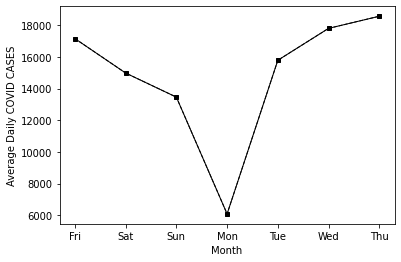

In [153]:
plt.plot( 'weekdays', 'mean', data=statsfr, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'weekdays', 'mean', data=statsfr, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.show()

The above line graph of the daily COVID cases shows that the numbers are all near each other for all weekdays except for Monday where it shows a massive drop in the number of cases and it then shows a massive increase in the number of cases. This is really something strange because how can a day cause a massive decrease in COVID cases then cause a massive increase in COVID cases. The only interpretation for this is that the data for Monday is not reliable because compared to the other data, it does not make sense.  

Now analyzing the daily number of confirmed death cases

In [14]:
statsfr2=dffr.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size]})

In [15]:
statsfr2

ddeaths 
 
 
 
 mean 
 std 
 size 
 
 
 weekdays 
 
 
 
 
 
 
 
 Fri 
 240.294118 
 294.708333 
 102 
 
 
 Mon 
 190.603960 
 181.585907 
 101 
 
 
 Sat 
 111.643564 
 151.810908 
 101 
 
 
 Sun 
 87.277228 
 113.236842 
 101 
 
 
 Thu 
 160.712871 
 191.063358 
 101 
 
 
 Tue 
 277.980198 
 331.414845 
 101 
 
 
 Wed 
 167.871287 
 217.813620 
 101

In [16]:
statsfr2.index

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object', name='weekdays')

In [17]:
ci95_hi2 = []
ci95_lo2 = []

In [18]:
for i in statsfr2.index:
    m, s, n = statsfr2.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi2.append(x[1])
    ci95_lo2.append(x[0])

In [19]:
ci95_hi2

[298.4661866078697,
 226.63008713989092,
 141.76241605427353,
 109.7430946508218,
 198.61929731676094,
 343.73195938213775,
 211.08488906531312]

In [20]:
ci95_lo2

[182.12204868624792,
 154.5778336521883,
 81.52471265859776,
 64.81136079472276,
 122.80644525749648,
 212.22843665746626,
 124.65768519211262]

In [22]:
statsfr2['ci95_hi2'] = ci95_hi2
statsfr2['ci95_lo2'] = ci95_lo2
print(statsfr2)

             ddeaths                     ci95_hi2    ci95_lo2
                mean         std size                        
weekdays                                                     
Fri       240.294118  294.708333  102  298.466187  182.122049
Mon       190.603960  181.585907  101  226.630087  154.577834
Sat       111.643564  151.810908  101  141.762416   81.524713
Sun        87.277228  113.236842  101  109.743095   64.811361
Thu       160.712871  191.063358  101  198.619297  122.806445
Tue       277.980198  331.414845  101  343.731959  212.228437
Wed       167.871287  217.813620  101  211.084889  124.657685


In [24]:
df_ci2= pd.DataFrame(statsfr2)

In [25]:
df_ci2

ddeaths 
 ci95_hi2 
 ci95_lo2 
 
 
 
 mean 
 std 
 size 
 
 
 
 
 weekdays 
 
 
 
 
 
 
 
 
 
 Fri 
 240.294118 
 294.708333 
 102 
 298.466187 
 182.122049 
 
 
 Mon 
 190.603960 
 181.585907 
 101 
 226.630087 
 154.577834 
 
 
 Sat 
 111.643564 
 151.810908 
 101 
 141.762416 
 81.524713 
 
 
 Sun 
 87.277228 
 113.236842 
 101 
 109.743095 
 64.811361 
 
 
 Thu 
 160.712871 
 191.063358 
 101 
 198.619297 
 122.806445 
 
 
 Tue 
 277.980198 
 331.414845 
 101 
 343.731959 
 212.228437 
 
 
 Wed 
 167.871287 
 217.813620 
 101 
 211.084889 
 124.657685

In [26]:
df_ci2= pd.DataFrame(statsfr2)

In [27]:
df_ci2['weekdays']=df_ci2.index

In [28]:
df_ci2

ddeaths 
 ci95_hi2 
 ci95_lo2 
 weekdays 
 
 
 
 mean 
 std 
 size 
 
 
 
 
 
 weekdays 
 
 
 
 
 
 
 
 
 
 
 Fri 
 240.294118 
 294.708333 
 102 
 298.466187 
 182.122049 
 Fri 
 
 
 Mon 
 190.603960 
 181.585907 
 101 
 226.630087 
 154.577834 
 Mon 
 
 
 Sat 
 111.643564 
 151.810908 
 101 
 141.762416 
 81.524713 
 Sat 
 
 
 Sun 
 87.277228 
 113.236842 
 101 
 109.743095 
 64.811361 
 Sun 
 
 
 Thu 
 160.712871 
 191.063358 
 101 
 198.619297 
 122.806445 
 Thu 
 
 
 Tue 
 277.980198 
 331.414845 
 101 
 343.731959 
 212.228437 
 Tue 
 
 
 Wed 
 167.871287 
 217.813620 
 101 
 211.084889 
 124.657685 
 Wed

In [30]:
df_ci2.columns

MultiIndex([( 'ddeaths', 'mean'),
            ( 'ddeaths',  'std'),
            ( 'ddeaths', 'size'),
            ('ci95_hi2',     ''),
            ('ci95_lo2',     ''),
            ('weekdays',     '')],
           )

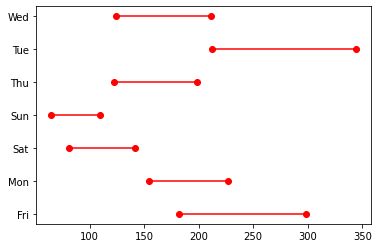

In [31]:
for lb,ub,y in zip(df_ci2['ci95_lo2'],df_ci2['ci95_hi2'],range(len(df_ci2))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci2)),list(df_ci2['weekdays']))

The confidence interval for the daily COVID deaths in France shows that the most occurring day of confirmed deaths is Tuesday, but its interval is big which shows that it is varied. There are some confidence intervals for days that are wider than others. Some days such as Saturday and Sunday have narrow confidence intervals which show that it is more accurate because the differences between the intervals are small;therefore they are more reliable. Then, other weekdays such as Tuesday and Friday have wide confidence intervals which show that they are less reliable because the values are more varied which means that a it can happpen but at a wide scale.  

In [52]:
statsfr2

ddeaths 
 ci95_hi2 
 ci95_lo2 
 weekdays 
 
 
 
 mean 
 std 
 size 
 
 
 
 
 
 weekdays 
 
 
 
 
 
 
 
 
 
 
 Fri 
 240.294118 
 294.708333 
 102 
 22546.158660 
 11750.096242 
 Fri 
 
 
 Sat 
 111.643564 
 151.810908 
 101 
 18560.554900 
 11390.395595 
 Sat 
 
 
 Sun 
 87.277228 
 113.236842 
 101 
 16949.018405 
 9964.387536 
 Sun 
 
 
 Mon 
 190.603960 
 181.585907 
 101 
 8678.723431 
 3502.088450 
 Mon 
 
 
 Tue 
 277.980198 
 331.414845 
 101 
 20312.045554 
 11249.241574 
 Tue 
 
 
 Wed 
 167.871287 
 217.813620 
 101 
 22930.408116 
 12655.651290 
 Wed 
 
 
 Thu 
 160.712871 
 191.063358 
 101 
 23802.491012 
 13313.568394 
 Thu

In [53]:
statsfr2.columns

MultiIndex([( 'ddeaths', 'mean'),
            ( 'ddeaths',  'std'),
            ( 'ddeaths', 'size'),
            ('ci95_hi2',     ''),
            ('ci95_lo2',     ''),
            ('weekdays',     '')],
           )

In [54]:
statsfr2.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [55]:
statsfr2.columns=['mean','std','size','ci95_hi2','ci95_lo2','weekdays']

In [56]:
statsfr2['weekdays']=statsfr2.index

In [57]:
statsfr2

,mean,std,size,ci95_hi2,ci95_lo2,weekdays
weekdays,,,,,,
Fri,240.294118,294.708333,102,22546.158660,11750.096242,Fri
Sat,111.643564,151.810908,101,18560.554900,11390.395595,Sat
Sun,87.277228,113.236842,101,16949.018405,9964.387536,Sun
Mon,190.603960,181.585907,101,8678.723431,3502.088450,Mon
Tue,277.980198,331.414845,101,20312.045554,11249.241574,Tue
Wed,167.871287,217.813620,101,22930.408116,12655.651290,Wed
Thu,160.712871,191.063358,101,23802.491012,13313.568394,Thu


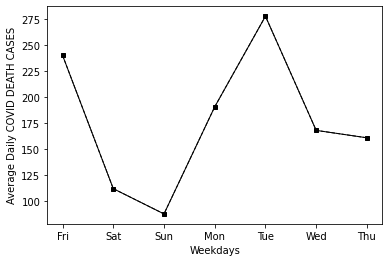

In [142]:
plt.plot( 'weekdays', 'mean', data=statsfr2, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'weekdays', 'mean', data=statsfr2, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Weekdays")
plt.ylabel("Average Daily COVID DEATH CASES")
plt.show()

The above line graph of the daily COVID death shows that the numbers are fluctuating between all days. There are some days with very low death cases such as Sunday and Saturday, then there are days with very high death cases such as Tuesday and Friday. The other days have nearly the same amount of death cases. 

 **Now comparing between 2020 and 2021 in terms of cases and death cases in France**

**1. In terms of cases**

In [40]:
df['date'][0]

'2020-02-24'

In [41]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [42]:
df['year'] = pd. DatetimeIndex(df['date']). year

In [43]:
df['year'][0]

2020

In [182]:
def ci_lb2(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [183]:
x=df['dcases']

In [185]:
ci_lb2(x)

2285.1835480837276

In [186]:
def ci_ub2(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [187]:
ci_ub2(x)

2422.2624439548904

In [191]:
statsdcases=df.groupby(['country','year','month']).agg({"dcases": [np.mean, np.std, np.size,ci_ub2,ci_lb2]})

In [192]:
statsdcases

dcases 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub2 
 ci_lb2 
 
 
 country 
 year 
 month 
 
 
 
 
 
 
 
 
 
 Afghanistan 
 2020 
 Jan 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 Feb 
 0.833333 
 2.041241 
 6.0 
 2.975485 
 -1.308818 
 
 
 Mar 
 5.258065 
 10.871883 
 31.0 
 9.245904 
 1.270225 
 
 
 Apr 
 55.366667 
 40.385627 
 30.0 
 70.446908 
 40.286426 
 
 
 May 
 430.741935 
 266.692078 
 31.0 
 528.565379 
 332.918491 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 Zimbabwe 
 2021 
 Aug 
 513.322581 
 386.841948 
 31.0 
 655.217353 
 371.427809 
 
 
 Sep 
 201.566667 
 135.119789 
 30.0 
 252.021225 
 151.112108 
 
 
 Oct 
 69.580645 
 58.035492 
 31.0 
 90.868235 
 48.293055 
 
 
 Nov 
 54.933333 
 82.622087 
 30.0 
 85.784928 
 24.081739 
 
 
 Dec 
 2536.548387 
 2572.199964 
 31.0 
 3480.038951 
 1593.057823 
 
 
 
 4488 rows × 5 columns

In [195]:
statsdcases=statsdcases.reset_index()

In [196]:
statsdcases

index 
 country 
 year 
 month 
 dcases 
 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub2 
 ci_lb2 
 
 
 
 
 0 
 0 
 Afghanistan 
 2020 
 Jan 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 1 
 1 
 Afghanistan 
 2020 
 Feb 
 0.833333 
 2.041241 
 6.0 
 2.975485 
 -1.308818 
 
 
 2 
 2 
 Afghanistan 
 2020 
 Mar 
 5.258065 
 10.871883 
 31.0 
 9.245904 
 1.270225 
 
 
 3 
 3 
 Afghanistan 
 2020 
 Apr 
 55.366667 
 40.385627 
 30.0 
 70.446908 
 40.286426 
 
 
 4 
 4 
 Afghanistan 
 2020 
 May 
 430.741935 
 266.692078 
 31.0 
 528.565379 
 332.918491 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 4483 
 4483 
 Zimbabwe 
 2021 
 Aug 
 513.322581 
 386.841948 
 31.0 
 655.217353 
 371.427809 
 
 
 4484 
 4484 
 Zimbabwe 
 2021 
 Sep 
 201.566667 
 135.119789 
 30.0 
 252.021225 
 151.112108 
 
 
 4485 
 4485 
 Zimbabwe 
 2021 
 Oct 
 69.580645 
 58.035492 
 31.0 
 90.868235 
 48.293055 
 
 
 4486 
 4486 
 Zimbabwe 
 2021 
 Nov 
 54.933333 
 82.622087 
 30.0 
 85.784928 
 24.081739 
 
 
 4487 
 4487 
 Zimbabwe 
 2021 
 Dec 
 2536.548387 
 2572.199964 
 31.0 
 3480.038951 
 1593.057823 
 
 
 
 4488 rows × 9 columns

In [197]:
statsFR=statsdcases[(statsdcases['country']=='France') & (statsdcases['year']==2021)]

In [198]:
statsFR

index 
 country 
 year 
 month 
 dcases 
 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub2 
 ci_lb2 
 
 
 
 
 1428 
 1428 
 France 
 2021 
 Jan 
 18655.935484 
 7238.793836 
 31.0 
 21311.146499 
 16000.724468 
 
 
 1429 
 1429 
 France 
 2021 
 Feb 
 19989.071429 
 9397.752308 
 28.0 
 23633.139352 
 16345.003505 
 
 
 1430 
 1430 
 France 
 2021 
 Mar 
 28693.483871 
 13879.207174 
 31.0 
 33784.418164 
 23602.549578 
 
 
 1431 
 1431 
 France 
 2021 
 Apr 
 32421.433333 
 27492.203564 
 30.0 
 42687.190857 
 22155.675810 
 
 
 1432 
 1432 
 France 
 2021 
 May 
 12900.645161 
 7670.719026 
 31.0 
 15714.287615 
 10087.002707 
 
 
 1433 
 1433 
 France 
 2021 
 Jun 
 3616.466667 
 3114.443823 
 30.0 
 4779.419103 
 2453.514231 
 
 
 1434 
 1434 
 France 
 2021 
 Jul 
 11394.129032 
 9338.220451 
 31.0 
 14819.415947 
 7968.842117 
 
 
 1435 
 1435 
 France 
 2021 
 Aug 
 20787.129032 
 9213.403131 
 31.0 
 24166.632585 
 17407.625480 
 
 
 1436 
 1436 
 France 
 2021 
 Sep 
 9033.533333 
 6421.571141 
 30.0 
 11431.387405 
 6635.679262 
 
 
 1437 
 1437 
 France 
 2021 
 Oct 
 5241.903226 
 2192.836996 
 31.0 
 6046.242330 
 4437.564122 
 
 
 1438 
 1438 
 France 
 2021 
 Nov 
 17001.600000 
 12090.447958 
 30.0 
 21516.247464 
 12486.952536 
 
 
 1439 
 1439 
 France 
 2021 
 Dec 
 74168.000000 
 56549.481173 
 31.0 
 94910.517156 
 53425.482844

In [199]:
statsFR.columns

MultiIndex([(  'index',       ''),
            ('country',       ''),
            (   'year',       ''),
            (  'month',       ''),
            ( 'dcases',   'mean'),
            ( 'dcases',    'std'),
            ( 'dcases',   'size'),
            ( 'dcases', 'ci_ub2'),
            ( 'dcases', 'ci_lb2')],
           )

In [201]:
statsFR21=statsdcases[(statsdcases['country']=='France')
  & (statsdcases['year']==2021)]
statsFR21

index 
 country 
 year 
 month 
 dcases 
 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub2 
 ci_lb2 
 
 
 
 
 1428 
 1428 
 France 
 2021 
 Jan 
 18655.935484 
 7238.793836 
 31.0 
 21311.146499 
 16000.724468 
 
 
 1429 
 1429 
 France 
 2021 
 Feb 
 19989.071429 
 9397.752308 
 28.0 
 23633.139352 
 16345.003505 
 
 
 1430 
 1430 
 France 
 2021 
 Mar 
 28693.483871 
 13879.207174 
 31.0 
 33784.418164 
 23602.549578 
 
 
 1431 
 1431 
 France 
 2021 
 Apr 
 32421.433333 
 27492.203564 
 30.0 
 42687.190857 
 22155.675810 
 
 
 1432 
 1432 
 France 
 2021 
 May 
 12900.645161 
 7670.719026 
 31.0 
 15714.287615 
 10087.002707 
 
 
 1433 
 1433 
 France 
 2021 
 Jun 
 3616.466667 
 3114.443823 
 30.0 
 4779.419103 
 2453.514231 
 
 
 1434 
 1434 
 France 
 2021 
 Jul 
 11394.129032 
 9338.220451 
 31.0 
 14819.415947 
 7968.842117 
 
 
 1435 
 1435 
 France 
 2021 
 Aug 
 20787.129032 
 9213.403131 
 31.0 
 24166.632585 
 17407.625480 
 
 
 1436 
 1436 
 France 
 2021 
 Sep 
 9033.533333 
 6421.571141 
 30.0 
 11431.387405 
 6635.679262 
 
 
 1437 
 1437 
 France 
 2021 
 Oct 
 5241.903226 
 2192.836996 
 31.0 
 6046.242330 
 4437.564122 
 
 
 1438 
 1438 
 France 
 2021 
 Nov 
 17001.600000 
 12090.447958 
 30.0 
 21516.247464 
 12486.952536 
 
 
 1439 
 1439 
 France 
 2021 
 Dec 
 74168.000000 
 56549.481173 
 31.0 
 94910.517156 
 53425.482844

In [202]:
statsFR20=statsdcases[(statsdcases['country']=='France')
  & (statsdcases['year']==2020)]
statsFR20

index 
 country 
 year 
 month 
 dcases 
 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub2 
 ci_lb2 
 
 
 
 
 1416 
 1416 
 France 
 2020 
 Jan 
 0.625000 
 0.744024 
 8.0 
 1.247019 
 0.002981 
 
 
 1417 
 1417 
 France 
 2020 
 Feb 
 3.275862 
 9.153050 
 29.0 
 6.757496 
 -0.205772 
 
 
 1418 
 1418 
 France 
 2020 
 Mar 
 1683.258065 
 1810.969832 
 31.0 
 2347.527162 
 1018.988967 
 
 
 1419 
 1419 
 France 
 2020 
 Apr 
 4676.966667 
 9414.028521 
 30.0 
 8192.222688 
 1161.710645 
 
 
 1420 
 1420 
 France 
 2020 
 May 
 727.516129 
 873.594905 
 31.0 
 1047.953327 
 407.078931 
 
 
 1421 
 1421 
 France 
 2020 
 Jun 
 584.966667 
 762.203045 
 30.0 
 869.577961 
 300.355372 
 
 
 1422 
 1422 
 France 
 2020 
 Jul 
 741.774194 
 600.058203 
 31.0 
 961.877319 
 521.671068 
 
 
 1423 
 1423 
 France 
 2020 
 Aug 
 3029.709677 
 2423.309434 
 31.0 
 3918.586754 
 2140.832601 
 
 
 1424 
 1424 
 France 
 2020 
 Sep 
 9491.100000 
 3343.298189 
 30.0 
 10739.508061 
 8242.691939 
 
 
 1425 
 1425 
 France 
 2020 
 Oct 
 26080.741935 
 15176.536825 
 31.0 
 31647.540586 
 20513.943285 
 
 
 1426 
 1426 
 France 
 2020 
 Nov 
 30285.166667 
 25170.760112 
 30.0 
 39684.082959 
 20886.250374 
 
 
 1427 
 1427 
 France 
 2020 
 Dec 
 12930.000000 
 5586.351206 
 31.0 
 14979.090166 
 10880.909834

In [211]:
statsFR20.columns=['index','country','year','month','mean','std','size','ci_lb2','ci_ub2']

In [216]:
statsFR21.columns=['index','country','year','month','mean','std','size','ci_lb2','ci_ub2']

In [212]:
x=statsFR20['month']
x

In [213]:
y1=statsFR20['mean']
y1

In [217]:
y2=statsFR21['mean']
y2

In [219]:
ci_lb_ub20=[statsFR20['ci_lb2'],statsFR20['ci_ub2']]
err20 = np.abs(ci_lb_ub20 - statsFR20['mean'].to_numpy())

In [220]:
ci_lb_ub21=[statsFR21['ci_lb2'],statsFR21['ci_ub2']]
err21 = np.abs(ci_lb_ub21 - statsFR21['mean'].to_numpy())

In [73]:
from matplotlib.transforms import Affine2D

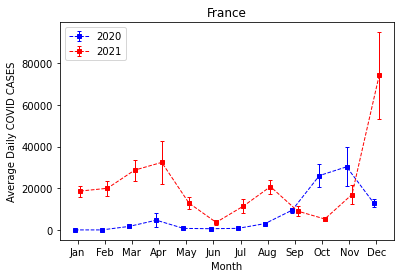

In [222]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsFR20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsFR21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("France")
plt.show()

The line graph above is the average daily covid cases between 2020 and 2021 with error bars. The graph shows that France did not suffer from any covid cases until September 2020 and then it increased and then decreased again in December. Then, for 2021 the base rate was 20 thousand case then the number kept on increasing and decreasing. The error bar for the last point in December is very large from both sides which show that this number is not as reliable as the other number. This shows that it might be a false point because it does not match with the other data since it shows a drastic increase from November to December by nearly 60 thousand cases which does not make sense. 

**2. In terms of death**

In [32]:
def ci_lb3(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [33]:
x=df['ddeaths']

In [34]:
ci_lb3(x)

43.18608989544058

In [35]:
def ci_ub3(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [36]:
ci_ub3(x)

45.39995896367227

In [44]:
statsddeaths=df.groupby(['country','year','month']).agg({"ddeaths": [np.mean, np.std, np.size,ci_ub3,ci_lb3]})

In [45]:
statsddeaths

ddeaths 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub3 
 ci_lb3 
 
 
 country 
 year 
 month 
 
 
 
 
 
 
 
 
 
 Afghanistan 
 2020 
 Apr 
 1.866667 
 2.285386 
 30 
 2.720044 
 1.013290 
 
 
 Aug 
 4.225806 
 6.432779 
 31 
 6.585369 
 1.866244 
 
 
 Dec 
 13.741935 
 6.717975 
 31 
 16.206108 
 11.277763 
 
 
 Feb 
 0.000000 
 0.000000 
 6 
 0.000000 
 0.000000 
 
 
 Jul 
 17.290323 
 15.064735 
 31 
 22.816112 
 11.764533 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 Zimbabwe 
 2021 
 Mar 
 1.935484 
 1.730809 
 31 
 2.570350 
 1.300618 
 
 
 May 
 0.870968 
 1.087564 
 31 
 1.269889 
 0.472046 
 
 
 Nov 
 0.966667 
 1.351457 
 30 
 1.471309 
 0.462024 
 
 
 Oct 
 1.774194 
 1.909794 
 31 
 2.474712 
 1.073676 
 
 
 Sep 
 6.800000 
 5.803685 
 30 
 8.967132 
 4.632868 
 
 
 
 4126 rows × 5 columns

In [46]:
statsddeaths=statsddeaths.reset_index()

In [60]:
statsFR2=statsddeaths[(statsddeaths['country']=='France') & (statsddeaths['year']==2021)]

In [48]:
statsFR2

country 
 year 
 month 
 ddeaths 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub3 
 ci_lb3 
 
 
 
 
 1331 
 France 
 2021 
 Apr 
 295.933333 
 86.466630 
 30 
 328.220504 
 263.646163 
 
 
 1332 
 France 
 2021 
 Aug 
 92.419355 
 43.202449 
 31 
 108.266141 
 76.572569 
 
 
 1333 
 France 
 2021 
 Dec 
 148.935484 
 64.952770 
 31 
 172.760352 
 125.110615 
 
 
 1334 
 France 
 2021 
 Feb 
 370.678571 
 225.874113 
 28 
 458.263409 
 283.093734 
 
 
 1335 
 France 
 2021 
 Jan 
 369.096774 
 218.571324 
 31 
 449.269383 
 288.924165 
 
 
 1336 
 France 
 2021 
 Jul 
 25.870968 
 14.368349 
 31 
 31.141321 
 20.600615 
 
 
 1337 
 France 
 2021 
 Jun 
 52.200000 
 27.508494 
 30 
 62.471840 
 41.928160 
 
 
 1338 
 France 
 2021 
 Mar 
 297.387097 
 143.757128 
 31 
 350.117637 
 244.656557 
 
 
 1339 
 France 
 2021 
 May 
 161.838710 
 71.109351 
 31 
 187.921830 
 135.755589 
 
 
 1340 
 France 
 2021 
 Nov 
 49.566667 
 31.250582 
 30 
 61.235826 
 37.897508 
 
 
 1341 
 France 
 2021 
 Oct 
 37.129032 
 17.615792 
 31 
 43.590557 
 30.667508 
 
 
 1342 
 France 
 2021 
 Sep 
 84.933333 
 47.229399 
 30 
 102.569081 
 67.297586

In [62]:
statsFR221=statsddeaths[(statsddeaths['country']=='France')
  & (statsddeaths['year']==2021)]
statsFR221

country 
 year 
 month 
 ddeaths 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub3 
 ci_lb3 
 
 
 
 
 1331 
 France 
 2021 
 Apr 
 295.933333 
 86.466630 
 30 
 328.220504 
 263.646163 
 
 
 1332 
 France 
 2021 
 Aug 
 92.419355 
 43.202449 
 31 
 108.266141 
 76.572569 
 
 
 1333 
 France 
 2021 
 Dec 
 148.935484 
 64.952770 
 31 
 172.760352 
 125.110615 
 
 
 1334 
 France 
 2021 
 Feb 
 370.678571 
 225.874113 
 28 
 458.263409 
 283.093734 
 
 
 1335 
 France 
 2021 
 Jan 
 369.096774 
 218.571324 
 31 
 449.269383 
 288.924165 
 
 
 1336 
 France 
 2021 
 Jul 
 25.870968 
 14.368349 
 31 
 31.141321 
 20.600615 
 
 
 1337 
 France 
 2021 
 Jun 
 52.200000 
 27.508494 
 30 
 62.471840 
 41.928160 
 
 
 1338 
 France 
 2021 
 Mar 
 297.387097 
 143.757128 
 31 
 350.117637 
 244.656557 
 
 
 1339 
 France 
 2021 
 May 
 161.838710 
 71.109351 
 31 
 187.921830 
 135.755589 
 
 
 1340 
 France 
 2021 
 Nov 
 49.566667 
 31.250582 
 30 
 61.235826 
 37.897508 
 
 
 1341 
 France 
 2021 
 Oct 
 37.129032 
 17.615792 
 31 
 43.590557 
 30.667508 
 
 
 1342 
 France 
 2021 
 Sep 
 84.933333 
 47.229399 
 30 
 102.569081 
 67.297586

In [63]:
statsFR220=statsddeaths[(statsddeaths['country']=='France')
  & (statsddeaths['year']==2020)]
statsFR220

country 
 year 
 month 
 ddeaths 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub3 
 ci_lb3 
 
 
 
 
 1319 
 France 
 2020 
 Apr 
 694.100000 
 339.189841 
 30 
 820.755568 
 567.444432 
 
 
 1320 
 France 
 2020 
 Aug 
 12.193548 
 10.215737 
 31 
 15.940711 
 8.446386 
 
 
 1321 
 France 
 2020 
 Dec 
 385.161290 
 239.988902 
 31 
 473.189930 
 297.132650 
 
 
 1322 
 France 
 2020 
 Feb 
 0.068966 
 0.257881 
 29 
 0.167058 
 -0.029127 
 
 
 1323 
 France 
 2020 
 Jan 
 0.000000 
 0.000000 
 8 
 0.000000 
 0.000000 
 
 
 1324 
 France 
 2020 
 Jul 
 14.064516 
 16.621142 
 31 
 20.161200 
 7.967832 
 
 
 1325 
 France 
 2020 
 Jun 
 34.700000 
 28.675533 
 30 
 45.407620 
 23.992380 
 
 
 1326 
 France 
 2020 
 Mar 
 113.677419 
 148.476572 
 31 
 168.139066 
 59.215773 
 
 
 1327 
 France 
 2020 
 May 
 153.322581 
 120.334087 
 31 
 197.461480 
 109.183681 
 
 
 1328 
 France 
 2020 
 Nov 
 534.166667 
 358.686501 
 30 
 668.102407 
 400.230926 
 
 
 1329 
 France 
 2020 
 Oct 
 157.096774 
 135.182680 
 31 
 206.682182 
 107.511367 
 
 
 1330 
 France 
 2020 
 Sep 
 45.066667 
 37.734036 
 30 
 59.156787 
 30.976546

In [64]:
statsFR220.columns=['country','year','month','mean','std','size','ci_lb3','ci_ub3']

In [65]:
statsFR221.columns=['country','year','month','mean','std','size','ci_lb3','ci_ub3']

In [66]:
x=statsFR220['month']
x

In [67]:
y3=statsFR220['mean']
y3

In [272]:
y4=statsFR221['mean']
y4

In [68]:
ci_lb_ub220=[statsFR220['ci_lb3'],statsFR220['ci_ub3']]
err220 = np.abs(ci_lb_ub220 - statsFR220['mean'].to_numpy())

In [70]:
ci_lb_ub221=[statsFR221['ci_lb3'],statsFR221['ci_ub3']]
err221 = np.abs(ci_lb_ub221 - statsFR221['mean'].to_numpy())

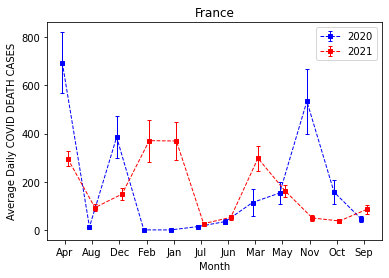

In [74]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err220, data=statsFR220,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err221, data=statsFR221,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID DEATH CASES")
plt.title("France")
plt.show()

The line graph above is the average daily covid deaths between 2020 and 2021 with error bars. The graph shows that France did not suffer from any covid deaths until September 2020 and then it increased and then decreased again in December. Then, for 2021 the base rate was 20 thousand deaths which is a massive rate, then the number kept on fluctuating. The error bar for the last point in December 2021 is very large that it takes the whole graph from both sides which show that this number is not as reliable as the other number. This shows that it might be a false point because it does not match with the other data since it shows a drastic increase from November to December by nearly 50 thousand cases which does not make sense. 

**Comparing between 2020 and 2021 in terms of several factors like regions,
income, and continents.**

**1. In terms of region: confirmed COVID 19 cases**

**Region no.1 East Asia and Pacific**

In [11]:
df['date'][0]

'2020-02-24'

In [12]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [13]:
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [14]:
df['year'] = pd. DatetimeIndex(df['date']). year

In [15]:
df['year'][0]

2020

In [48]:
df['region'].unique()

In [16]:
def ci_lb4(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [17]:
x=df['dcases']

In [18]:
ci_lb4(x)

2285.1835480837276

In [19]:
def ci_ub4(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [20]:
ci_ub4(x)

2422.2624439548904

In [21]:
rdcases=df.groupby(['region','year','month']).agg({"dcases": [np.mean, np.std, np.size,ci_ub4,ci_lb4]})

In [22]:
rdcases

dcases 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub4 
 ci_lb4 
 
 
 region 
 year 
 month 
 
 
 
 
 
 
 
 
 
 East Asia & Pacific 
 2020 
 Apr 
 92.700000 
 177.828711 
 570 
 107.329764 
 78.070236 
 
 
 Aug 
 423.417657 
 1044.901057 
 589 
 507.976780 
 338.858534 
 
 
 Dec 
 630.715288 
 1475.101424 
 713 
 739.173912 
 522.256663 
 
 
 Feb 
 250.304795 
 1155.872616 
 292 
 383.435013 
 117.174576 
 
 
 Jan 
 126.679487 
 436.945076 
 78 
 225.195380 
 28.163595 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 Sub-Saharan Africa 
 2021 
 Mar 
 161.274537 
 393.852860 
 1457 
 181.514676 
 141.034398 
 
 
 May 
 128.577213 
 488.161505 
 1457 
 153.663883 
 103.490544 
 
 
 Nov 
 89.737589 
 588.981229 
 1410 
 120.506577 
 58.968601 
 
 
 Oct 
 87.528483 
 293.259577 
 1457 
 102.599123 
 72.457843 
 
 
 Sep 
 247.950355 
 1021.166824 
 1410 
 301.297165 
 194.603545 
 
 
 
 166 rows × 5 columns

In [23]:
rdcases=rdcases.reset_index()

In [28]:
statsR=rdcases[(rdcases['region']=='East Asia & Pacific ') & (rdcases['year']==2020)]

In [29]:
statsR

region 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub4 
 ci_lb4

In [30]:
statsR.columns

MultiIndex([('region',       ''),
            (  'year',       ''),
            ( 'month',       ''),
            ('dcases',   'mean'),
            ('dcases',    'std'),
            ('dcases',   'size'),
            ('dcases', 'ci_ub4'),
            ('dcases', 'ci_lb4')],
           )

In [31]:
statsR21=rdcases[(rdcases['region']=='East Asia & Pacific')
  & (rdcases['year']==2021)]
statsR21

region 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub4 
 ci_lb4 
 
 
 
 
 12 
 East Asia & Pacific 
 2021 
 Apr 
 1060.565217 
 2329.091311 
 690 
 1234.655140 
 886.475295 
 
 
 13 
 East Asia & Pacific 
 2021 
 Aug 
 4614.985411 
 7931.303734 
 754 
 5182.014870 
 4047.955952 
 
 
 14 
 East Asia & Pacific 
 2021 
 Dec 
 1599.202581 
 3930.662042 
 775 
 1876.370268 
 1322.034893 
 
 
 15 
 East Asia & Pacific 
 2021 
 Feb 
 713.222050 
 1994.214109 
 644 
 867.532447 
 558.911653 
 
 
 16 
 East Asia & Pacific 
 2021 
 Jan 
 974.037868 
 2493.902759 
 713 
 1157.405099 
 790.670637 
 
 
 17 
 East Asia & Pacific 
 2021 
 Jul 
 3584.767473 
 8539.384316 
 744 
 4199.372652 
 2970.162294 
 
 
 18 
 East Asia & Pacific 
 2021 
 Jun 
 1386.216667 
 3044.425526 
 720 
 1608.967267 
 1163.466066 
 
 
 19 
 East Asia & Pacific 
 2021 
 Mar 
 654.294530 
 1684.235185 
 713 
 778.129969 
 530.459091 
 
 
 20 
 East Asia & Pacific 
 2021 
 May 
 1146.808803 
 2127.435975 
 727 
 1301.712581 
 991.905025 
 
 
 21 
 East Asia & Pacific 
 2021 
 Nov 
 1447.053333 
 2829.960769 
 750 
 1649.915113 
 1244.191554 
 
 
 22 
 East Asia & Pacific 
 2021 
 Oct 
 1877.485161 
 3075.700882 
 775 
 2094.365903 
 1660.604419 
 
 
 23 
 East Asia & Pacific 
 2021 
 Sep 
 3389.320000 
 5723.491086 
 750 
 3799.600453 
 2979.039547

In [33]:
statsR20=rdcases[(rdcases['region']=='East Asia & Pacific')
  & (rdcases['year']==2020)]
statsR20

region 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub4 
 ci_lb4 
 
 
 
 
 0 
 East Asia & Pacific 
 2020 
 Apr 
 92.700000 
 177.828711 
 570 
 107.329764 
 78.070236 
 
 
 1 
 East Asia & Pacific 
 2020 
 Aug 
 423.417657 
 1044.901057 
 589 
 507.976780 
 338.858534 
 
 
 2 
 East Asia & Pacific 
 2020 
 Dec 
 630.715288 
 1475.101424 
 713 
 739.173912 
 522.256663 
 
 
 3 
 East Asia & Pacific 
 2020 
 Feb 
 250.304795 
 1155.872616 
 292 
 383.435013 
 117.174576 
 
 
 4 
 East Asia & Pacific 
 2020 
 Jan 
 126.679487 
 436.945076 
 78 
 225.195380 
 28.163595 
 
 
 5 
 East Asia & Pacific 
 2020 
 Jul 
 252.157895 
 571.667546 
 589 
 298.420367 
 205.895422 
 
 
 6 
 East Asia & Pacific 
 2020 
 Jun 
 112.329825 
 270.676176 
 570 
 134.598043 
 90.061606 
 
 
 7 
 East Asia & Pacific 
 2020 
 Mar 
 55.969828 
 102.512114 
 464 
 65.321753 
 46.617902 
 
 
 8 
 East Asia & Pacific 
 2020 
 May 
 86.125637 
 193.352744 
 589 
 101.772801 
 70.478472 
 
 
 9 
 East Asia & Pacific 
 2020 
 Nov 
 467.615964 
 1031.543735 
 664 
 546.220071 
 389.011857 
 
 
 10 
 East Asia & Pacific 
 2020 
 Oct 
 447.566069 
 1000.134807 
 613 
 526.895826 
 368.236311 
 
 
 11 
 East Asia & Pacific 
 2020 
 Sep 
 420.385965 
 1060.530412 
 570 
 507.634584 
 333.137346

In [34]:
statsR20.columns=['region','year','month','mean','std','size','ci_lb4','ci_ub4']

In [35]:
statsR21.columns=['region','year','month','mean','std','size','ci_lb4','ci_ub4']

In [37]:
x=statsR20['region']
x

In [38]:
y1=statsR20['mean']
y1

In [39]:
y2=statsR21['mean']
y2

In [40]:
ci_lb_ubR20=[statsR20['ci_lb4'],statsR20['ci_ub4']]
errR20 = np.abs(ci_lb_ubR20 - statsR20['mean'].to_numpy())

In [42]:
ci_lb_ubR21=[statsR21['ci_lb4'],statsR21['ci_ub4']]
errR21 = np.abs(ci_lb_ubR21 - statsR21['mean'].to_numpy())

In [49]:
from matplotlib.transforms import Affine2D

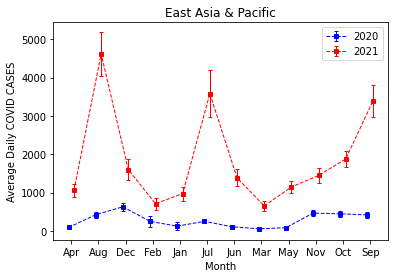

In [46]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errR20, data=statsR20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errR21, data=statsR21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("East Asia & Pacific")
plt.show()

The line graph above is the average daily covid cases between 2020 and 2021 with error bars. The graph shows that the East Asia and Pacific region did not suffer from any cases deaths until August 2020 and then kept on increaing and decreasing but not significantly. Then, for 2021 the base rate was only 1 thousand cases which is a very small rate, then the number kept on fluctuating. Some error bars are bigger than others in the 2021 points which show that they may be inaccurate; therefore, not that reliable.

**Region no.2 Europe and Central Asia**

In [74]:
statsR2=rdcases[(rdcases['region']=='Europe & Central Asia') & (rdcases['year']==2020)]

In [75]:
statsR2

region 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub4 
 ci_lb4 
 
 
 
 
 24 
 Europe & Central Asia 
 2020 
 Apr 
 693.848667 
 1939.781037 
 1500 
 792.092653 
 595.604680 
 
 
 25 
 Europe & Central Asia 
 2020 
 Aug 
 557.484503 
 1427.035570 
 1581 
 627.880793 
 487.088214 
 
 
 26 
 Europe & Central Asia 
 2020 
 Dec 
 5276.588868 
 21992.213905 
 1581 
 6361.474414 
 4191.703322 
 
 
 27 
 Europe & Central Asia 
 2020 
 Feb 
 4.819936 
 24.944837 
 311 
 7.603155 
 2.036716 
 
 
 28 
 Europe & Central Asia 
 2020 
 Jan 
 0.894737 
 0.936586 
 19 
 1.346157 
 0.443317 
 
 
 29 
 Europe & Central Asia 
 2020 
 Jul 
 398.997470 
 1080.452784 
 1581 
 452.296679 
 345.698261 
 
 
 30 
 Europe & Central Asia 
 2020 
 Jun 
 351.989542 
 1137.680770 
 1530 
 409.040996 
 294.938089 
 
 
 31 
 Europe & Central Asia 
 2020 
 Mar 
 338.220733 
 1065.272767 
 1418 
 393.714208 
 282.727259 
 
 
 32 
 Europe & Central Asia 
 2020 
 May 
 424.242884 
 1403.684633 
 1581 
 493.487262 
 354.998506 
 
 
 33 
 Europe & Central Asia 
 2020 
 Nov 
 5183.352288 
 9110.089031 
 1530 
 5640.197332 
 4726.507243 
 
 
 34 
 Europe & Central Asia 
 2020 
 Oct 
 3193.193548 
 6395.982837 
 1581 
 3508.710184 
 2877.676913 
 
 
 35 
 Europe & Central Asia 
 2020 
 Sep 
 1008.238562 
 2527.394697 
 1530 
 1134.980215 
 881.496909

In [76]:
statsR2.columns

MultiIndex([('region',       ''),
            (  'year',       ''),
            ( 'month',       ''),
            ('dcases',   'mean'),
            ('dcases',    'std'),
            ('dcases',   'size'),
            ('dcases', 'ci_ub4'),
            ('dcases', 'ci_lb4')],
           )

In [78]:
statsR221=rdcases[(rdcases['region']=='Europe & Central Asia')
  & (rdcases['year']==2021)]
statsR221

region 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub4 
 ci_lb4 
 
 
 
 
 36 
 Europe & Central Asia 
 2021 
 Apr 
 4400.757516 
 9911.409826 
 1530 
 4897.786519 
 3903.728514 
 
 
 37 
 Europe & Central Asia 
 2021 
 Aug 
 3180.007590 
 6844.920329 
 1581 
 3517.670508 
 2842.344672 
 
 
 38 
 Europe & Central Asia 
 2021 
 Dec 
 9411.908918 
 22368.523899 
 1581 
 10515.358001 
 8308.459836 
 
 
 39 
 Europe & Central Asia 
 2021 
 Feb 
 3034.478291 
 5547.740717 
 1428 
 3322.462489 
 2746.494094 
 
 
 40 
 Europe & Central Asia 
 2021 
 Jan 
 4423.700822 
 9236.689814 
 1581 
 4879.350777 
 3968.050868 
 
 
 41 
 Europe & Central Asia 
 2021 
 Jul 
 2646.413662 
 7396.965106 
 1581 
 3011.309191 
 2281.518133 
 
 
 42 
 Europe & Central Asia 
 2021 
 Jun 
 1075.566013 
 2875.930124 
 1530 
 1219.785726 
 931.346300 
 
 
 43 
 Europe & Central Asia 
 2021 
 Mar 
 4017.991145 
 6963.850364 
 1581 
 4361.520934 
 3674.461356 
 
 
 44 
 Europe & Central Asia 
 2021 
 May 
 1864.763441 
 3692.159287 
 1581 
 2046.899276 
 1682.627606 
 
 
 45 
 Europe & Central Asia 
 2021 
 Nov 
 6763.426144 
 11088.295989 
 1530 
 7319.472639 
 6207.379649 
 
 
 46 
 Europe & Central Asia 
 2021 
 Oct 
 4243.963947 
 8383.799608 
 1581 
 4657.540454 
 3830.387440 
 
 
 47 
 Europe & Central Asia 
 2021 
 Sep 
 3095.722222 
 6524.122498 
 1530 
 3422.888403 
 2768.556042

In [79]:
statsR220=rdcases[(rdcases['region']=='Europe & Central Asia')
  & (rdcases['year']==2020)]
statsR20

,region,year,month,mean,std,size,ci_lb4,ci_ub4
0,East Asia & Pacific,2020,Apr,92.700000,177.828711,570,107.329764,78.070236
1,East Asia & Pacific,2020,Aug,423.417657,1044.901057,589,507.976780,338.858534
2,East Asia & Pacific,2020,Dec,630.715288,1475.101424,713,739.173912,522.256663
3,East Asia & Pacific,2020,Feb,250.304795,1155.872616,292,383.435013,117.174576
4,East Asia & Pacific,2020,Jan,126.679487,436.945076,78,225.195380,28.163595
5,East Asia & Pacific,2020,Jul,252.157895,571.667546,589,298.420367,205.895422
6,East Asia & Pacific,2020,Jun,112.329825,270.676176,570,134.598043,90.061606
7,East Asia & Pacific,2020,Mar,55.969828,102.512114,464,65.321753,46.617902
8,East Asia & Pacific,2020,May,86.125637,193.352744,589,101.772801,70.478472
9,East Asia & Pacific,2020,Nov,467.615964,1031.543735,664,546.220071,389.011857


In [80]:
statsR220.columns=['region','year','month','mean','std','size','ci_lb4','ci_ub4']

In [81]:
statsR221.columns=['region','year','month','mean','std','size','ci_lb4','ci_ub4']

In [82]:
x=statsR220['region']
x

In [83]:
y1=statsR220['mean']
y1

In [84]:
y2=statsR221['mean']
y2

In [85]:
ci_lb_ubR220=[statsR220['ci_lb4'],statsR220['ci_ub4']]
errR220 = np.abs(ci_lb_ubR220 - statsR220['mean'].to_numpy())

In [86]:
ci_lb_ubR221=[statsR221['ci_lb4'],statsR221['ci_ub4']]
errR221 = np.abs(ci_lb_ubR221 - statsR221['mean'].to_numpy())

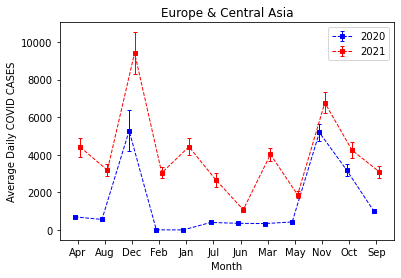

In [87]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errR220, data=statsR220,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errR221, data=statsR221,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Europe & Central Asia")
plt.show()

The line graph above is the average daily covid cases between 2020 and 2021 with error bars. The graph shows that the Europe and Central Asia region did not suffer from any cases deaths until August 2020 and then kept on increaing and decreasing but not significantly. Then, for 2021 the base rate was only 1 thousand cases which is a very small rate, then the number kept on fluctuating. Some error bars are bigger than others in the 2021 points which show that they may be inaccurate; therefore, not that reliable.

**2. In terms of income: confirmed COVID 19 deaths**

**No.1 low income**

In [16]:
df['date'][0]

'2020-02-24'

In [18]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [19]:
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [20]:
df['year'] = pd. DatetimeIndex(df['date']). year

In [15]:
df['income'].unique()

In [23]:
x=df['ddeaths']

In [24]:
def ci_lb5(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [25]:
ci_lb5(x)

43.18608989544058

In [27]:
def ci_ub5(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [28]:
ci_ub5(x)

45.39995896367227

In [86]:
incdeaths=df.groupby(['income','year','month']).agg({"ddeaths": [np.mean, np.std, np.size,ci_ub5,ci_lb5]})

In [87]:
incdeaths

ddeaths 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub5 
 ci_lb5 
 
 
 income 
 year 
 month 
 
 
 
 
 
 
 
 
 
 High income 
 2020 
 Apr 
 98.662573 
 318.565638 
 1710 
 113.772301 
 83.552845 
 
 
 Aug 
 21.320883 
 132.611288 
 1767 
 27.508281 
 15.133485 
 
 
 Dec 
 114.995473 
 379.800723 
 1767 
 132.716274 
 97.274671 
 
 
 Feb 
 0.108268 
 0.597571 
 508 
 0.160356 
 0.056179 
 
 
 Jan 
 0.000000 
 0.000000 
 75 
 0.000000 
 0.000000 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 Upper middle income 
 2021 
 Mar 
 93.728196 
 337.437017 
 1674 
 109.904429 
 77.551963 
 
 
 May 
 96.706691 
 295.246678 
 1674 
 110.860381 
 82.553000 
 
 
 Nov 
 56.883951 
 171.705193 
 1620 
 65.251510 
 48.516391 
 
 
 Oct 
 61.903226 
 160.512807 
 1674 
 69.597973 
 54.208478 
 
 
 Sep 
 81.536420 
 176.995456 
 1620 
 90.161785 
 72.911054 
 
 
 
 96 rows × 5 columns

In [88]:
incdeaths=incdeaths.reset_index()

In [89]:
incdeaths

income 
 year 
 month 
 ddeaths 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub5 
 ci_lb5 
 
 
 
 
 0 
 High income 
 2020 
 Apr 
 98.662573 
 318.565638 
 1710 
 113.772301 
 83.552845 
 
 
 1 
 High income 
 2020 
 Aug 
 21.320883 
 132.611288 
 1767 
 27.508281 
 15.133485 
 
 
 2 
 High income 
 2020 
 Dec 
 114.995473 
 379.800723 
 1767 
 132.716274 
 97.274671 
 
 
 3 
 High income 
 2020 
 Feb 
 0.108268 
 0.597571 
 508 
 0.160356 
 0.056179 
 
 
 4 
 High income 
 2020 
 Jan 
 0.000000 
 0.000000 
 75 
 0.000000 
 0.000000 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 91 
 Upper middle income 
 2021 
 Mar 
 93.728196 
 337.437017 
 1674 
 109.904429 
 77.551963 
 
 
 92 
 Upper middle income 
 2021 
 May 
 96.706691 
 295.246678 
 1674 
 110.860381 
 82.553000 
 
 
 93 
 Upper middle income 
 2021 
 Nov 
 56.883951 
 171.705193 
 1620 
 65.251510 
 48.516391 
 
 
 94 
 Upper middle income 
 2021 
 Oct 
 61.903226 
 160.512807 
 1674 
 69.597973 
 54.208478 
 
 
 95 
 Upper middle income 
 2021 
 Sep 
 81.536420 
 176.995456 
 1620 
 90.161785 
 72.911054 
 
 
 
 96 rows × 8 columns

In [90]:
statsI=incdeaths[(incdeaths['income']=='Low income ') & (incdeaths['year']==2020)]

In [91]:
statsI.columns

MultiIndex([( 'income',       ''),
            (   'year',       ''),
            (  'month',       ''),
            ('ddeaths',   'mean'),
            ('ddeaths',    'std'),
            ('ddeaths',   'size'),
            ('ddeaths', 'ci_ub5'),
            ('ddeaths', 'ci_lb5')],
           )

In [92]:
statsI21=incdeaths[(incdeaths['income']=='Low income')
  & (incdeaths['year']==2021)]
statsI21

income 
 year 
 month 
 ddeaths 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub5 
 ci_lb5 
 
 
 
 
 36 
 Low income 
 2021 
 Apr 
 3.013793 
 6.546447 
 870 
 3.449405 
 2.578182 
 
 
 37 
 Low income 
 2021 
 Aug 
 4.560623 
 8.160108 
 899 
 5.094756 
 4.026489 
 
 
 38 
 Low income 
 2021 
 Dec 
 1.084538 
 3.506528 
 899 
 1.314064 
 0.855013 
 
 
 39 
 Low income 
 2021 
 Feb 
 2.721675 
 22.240838 
 812 
 4.253714 
 1.189636 
 
 
 40 
 Low income 
 2021 
 Jan 
 2.220245 
 5.373406 
 899 
 2.571970 
 1.868519 
 
 
 41 
 Low income 
 2021 
 Jul 
 6.929922 
 31.430352 
 899 
 8.987249 
 4.872596 
 
 
 42 
 Low income 
 2021 
 Jun 
 5.998851 
 17.450077 
 870 
 7.160008 
 4.837693 
 
 
 43 
 Low income 
 2021 
 Mar 
 2.449388 
 8.871544 
 899 
 3.030090 
 1.868686 
 
 
 44 
 Low income 
 2021 
 May 
 6.284761 
 27.044694 
 899 
 8.055017 
 4.514505 
 
 
 45 
 Low income 
 2021 
 Nov 
 1.322989 
 4.245656 
 870 
 1.605502 
 1.040475 
 
 
 46 
 Low income 
 2021 
 Oct 
 3.101224 
 23.121153 
 899 
 4.614658 
 1.587790 
 
 
 47 
 Low income 
 2021 
 Sep 
 3.171264 
 6.810055 
 870 
 3.624417 
 2.718112

In [93]:
statsI20=incdeaths[(incdeaths['income']=='Low income')
  & (incdeaths['year']==2020)]
statsI20

income 
 year 
 month 
 ddeaths 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub5 
 ci_lb5 
 
 
 
 
 24 
 Low income 
 2020 
 Apr 
 0.322034 
 0.930519 
 826 
 0.385585 
 0.258483 
 
 
 25 
 Low income 
 2020 
 Aug 
 1.579533 
 3.871986 
 899 
 1.832980 
 1.326085 
 
 
 26 
 Low income 
 2020 
 Dec 
 2.105673 
 7.706689 
 899 
 2.610127 
 1.601219 
 
 
 27 
 Low income 
 2020 
 Feb 
 0.000000 
 0.000000 
 35 
 0.000000 
 0.000000 
 
 
 28 
 Low income 
 2020 
 Jan 
 0.000000 
 0.000000 
 7 
 0.000000 
 0.000000 
 
 
 29 
 Low income 
 2020 
 Jul 
 1.528365 
 4.874371 
 899 
 1.847425 
 1.209305 
 
 
 30 
 Low income 
 2020 
 Jun 
 1.425287 
 4.293148 
 870 
 1.710961 
 1.139614 
 
 
 31 
 Low income 
 2020 
 Mar 
 0.095238 
 0.394160 
 378 
 0.135101 
 0.055375 
 
 
 32 
 Low income 
 2020 
 May 
 0.796440 
 1.997144 
 899 
 0.927167 
 0.665714 
 
 
 33 
 Low income 
 2020 
 Nov 
 1.631034 
 4.266788 
 870 
 1.914954 
 1.347115 
 
 
 34 
 Low income 
 2020 
 Oct 
 1.209121 
 3.298222 
 899 
 1.425012 
 0.993231 
 
 
 35 
 Low income 
 2020 
 Sep 
 1.239080 
 3.103187 
 870 
 1.445572 
 1.032589

In [94]:
statsI20.columns=['income','year','month','mean','std','size','ci_lb5','ci_ub5']

In [95]:
statsI21.columns=['income','year','month','mean','std','size','ci_lb5','ci_ub5']

In [96]:
x=statsI20['income']
x

In [97]:
y1=statsI20['mean']
y1

In [98]:
y2=statsI21['mean']
y2

In [104]:
ci_lb_ubI20=[statsI20['ci_lb5'],statsI20['ci_ub5']]
errI20 = np.abs(ci_lb_ubI20 - statsI20['mean'].to_numpy())

In [106]:
ci_lb_ubI21=[statsI21['ci_lb5'],statsI21['ci_ub5']]
errI21 = np.abs(ci_lb_ubI21 - statsI21['mean'].to_numpy())

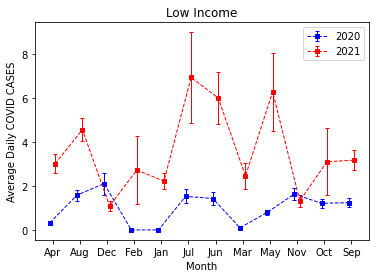

In [107]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errI20, data=statsI20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errI21, data=statsI21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Low Income")
plt.show()

The line graph above is the average daily covid cases between 2020 and 2021 with error bars. The graph shows that low income people suffered from covid 19 in 2021 more than in 2020 and this is definitely because of its spread. 

**No.2 high income**

In [69]:
statsI220=incdeaths[(incdeaths['income']=='High income') & (incdeaths['year']==2020)]

In [70]:
statsI221=incdeaths[(incdeaths['income']=='High income')
  & (incdeaths['year']==2021)]
statsI221

income 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub5 
 ci_lb5 
 
 
 
 
 12 
 High income 
 2021 
 Apr 
 3978.551462 
 10659.667441 
 1710 
 4484.144840 
 3472.958084 
 
 
 13 
 High income 
 2021 
 Aug 
 4689.092290 
 20751.092792 
 1777 
 5654.568160 
 3723.616421 
 
 
 14 
 High income 
 2021 
 Dec 
 11119.231368 
 37758.466932 
 1798 
 12865.697682 
 9372.765055 
 
 
 15 
 High income 
 2021 
 Feb 
 3901.845238 
 12490.965193 
 1596 
 4515.123160 
 3288.567316 
 
 
 16 
 High income 
 2021 
 Jan 
 7123.431239 
 27693.041493 
 1767 
 8415.537480 
 5831.324999 
 
 
 17 
 High income 
 2021 
 Jul 
 2578.013582 
 9520.992379 
 1767 
 3022.245527 
 2133.781638 
 
 
 18 
 High income 
 2021 
 Jun 
 1098.700000 
 2682.523739 
 1710 
 1225.933448 
 971.466552 
 
 
 19 
 High income 
 2021 
 Mar 
 3915.258065 
 9627.120804 
 1767 
 4364.441765 
 3466.074364 
 
 
 20 
 High income 
 2021 
 May 
 2068.009055 
 4985.409835 
 1767 
 2300.619083 
 1835.399027 
 
 
 21 
 High income 
 2021 
 Nov 
 5843.591379 
 15016.968768 
 1740 
 6549.678224 
 5137.504535 
 
 
 22 
 High income 
 2021 
 Oct 
 3422.258065 
 12665.341213 
 1798 
 4008.076123 
 2836.440006 
 
 
 23 
 High income 
 2021 
 Sep 
 4244.210345 
 20143.711503 
 1740 
 5191.352869 
 3297.067821

In [71]:
statsI220.columns=['income','year','month','mean','std','size','ci_lb5','ci_ub5']

In [72]:
statsI221.columns=['income','year','month','mean','std','size','ci_lb5','ci_ub5']

In [73]:
x=statsI220['income']

In [74]:
y1=statsI220['mean']

In [76]:
y2=statsI221['mean']

In [77]:
ci_lb_ubI220=[statsI220['ci_lb5'],statsI220['ci_ub5']]
errI220 = np.abs(ci_lb_ubI220 - statsI220['mean'].to_numpy())

In [78]:
ci_lb_ubI221=[statsI221['ci_lb5'],statsI221['ci_ub5']]
errI221 = np.abs(ci_lb_ubI221 - statsI221['mean'].to_numpy())

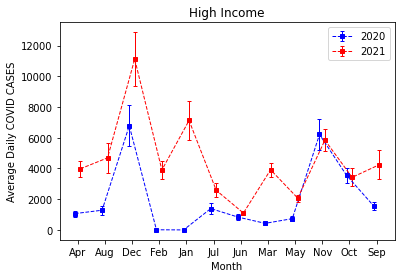

In [79]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errI220, data=statsI220,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errI221, data=statsI221,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("High Income")
plt.show()

The line graph above is the average daily covid cases between 2020 and 2021 with error bars. The high income people also suffered from covid 19 in 2021 more than in 2020. But, unexpectedly high income people suffered from more cases than low income. The data actually does not give a representative sample of the low income people which makes high income people look as if they suffered more from covid 19. 

**3. In terms of continent: confirmed COVID 19 cases**

**No.1 Oceania**

In [80]:
df['continent'].unique()

In [81]:
x=df['dcases']

In [82]:
def ci_lb6(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [83]:
ci_lb6(x)

2285.1835480837276

In [84]:
def ci_ub6(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [85]:
ci_ub6(x)

2422.2624439548904

In [122]:
contcases=df.groupby(['continent','year','month']).agg({"dcases": [np.mean, np.std, np.size,ci_ub6,ci_lb6]})

In [123]:
contcases=contcases.reset_index()

In [124]:
statsC21=contcases[(contcases['continent']=='Oceania')
  & (contcases['year']==2021)]
statsC21

continent 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub6 
 ci_lb6 
 
 
 
 
 107 
 Oceania 
 2021 
 Apr 
 23.579167 
 75.020011 
 240 
 33.118639 
 14.039694 
 
 
 108 
 Oceania 
 2021 
 Aug 
 133.093426 
 293.247232 
 289 
 167.045162 
 99.141689 
 
 
 109 
 Oceania 
 2021 
 Dec 
 703.383871 
 3321.515757 
 310 
 1074.583839 
 332.183903 
 
 
 110 
 Oceania 
 2021 
 Feb 
 2.964286 
 10.315584 
 224 
 4.322541 
 1.606031 
 
 
 111 
 Oceania 
 2021 
 Jan 
 2.475806 
 5.741339 
 248 
 3.193880 
 1.757733 
 
 
 112 
 Oceania 
 2021 
 Jul 
 107.000000 
 285.278092 
 279 
 140.620892 
 73.379108 
 
 
 113 
 Oceania 
 2021 
 Jun 
 21.340741 
 55.849794 
 270 
 28.032590 
 14.648892 
 
 
 114 
 Oceania 
 2021 
 Mar 
 20.943548 
 77.762204 
 248 
 30.669319 
 11.217778 
 
 
 115 
 Oceania 
 2021 
 May 
 21.393130 
 80.661739 
 262 
 31.205717 
 11.580542 
 
 
 116 
 Oceania 
 2021 
 Nov 
 168.610000 
 401.043819 
 300 
 214.175986 
 123.044014 
 
 
 117 
 Oceania 
 2021 
 Oct 
 250.867742 
 635.574188 
 310 
 321.897096 
 179.838388 
 
 
 118 
 Oceania 
 2021 
 Sep 
 198.343333 
 521.456096 
 300 
 257.590378 
 139.096288

In [125]:
statsC20=contcases[(contcases['continent']=='Oceania')
  & (contcases['year']==2020)]
statsC20

continent 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub6 
 ci_lb6 
 
 
 
 
 95 
 Oceania 
 2020 
 Apr 
 25.500000 
 51.758327 
 120 
 34.855709 
 16.144291 
 
 
 96 
 Oceania 
 2020 
 Aug 
 73.653226 
 140.644743 
 124 
 98.654072 
 48.652379 
 
 
 97 
 Oceania 
 2020 
 Dec 
 3.012097 
 7.196199 
 248 
 3.912130 
 2.112063 
 
 
 98 
 Oceania 
 2020 
 Feb 
 0.548387 
 1.859009 
 31 
 1.230277 
 -0.133503 
 
 
 99 
 Oceania 
 2020 
 Jan 
 1.500000 
 1.643168 
 6 
 3.224399 
 -0.224399 
 
 
 100 
 Oceania 
 2020 
 Jul 
 76.322581 
 150.496120 
 124 
 103.074597 
 49.570565 
 
 
 101 
 Oceania 
 2020 
 Jun 
 6.208333 
 16.116642 
 120 
 9.121538 
 3.295128 
 
 
 102 
 Oceania 
 2020 
 Mar 
 59.609195 
 118.538715 
 87 
 84.873223 
 34.345167 
 
 
 103 
 Oceania 
 2020 
 May 
 3.725806 
 7.024161 
 124 
 4.974413 
 2.477200 
 
 
 104 
 Oceania 
 2020 
 Nov 
 2.369159 
 5.038740 
 214 
 3.048109 
 1.690209 
 
 
 105 
 Oceania 
 2020 
 Oct 
 4.574324 
 7.357805 
 148 
 5.769566 
 3.379083 
 
 
 106 
 Oceania 
 2020 
 Sep 
 12.100000 
 23.138022 
 120 
 16.282372 
 7.917628

In [126]:
statsC20.columns=['continent','year','month','mean','std','size','ci_lb6','ci_ub6']

In [127]:
statsC21.columns=['continent','year','month','mean','std','size','ci_lb6','ci_ub6']

In [128]:
x=statsC20['continent']
x

In [129]:
y1=statsC20['mean']
y1

In [130]:
y2=statsC21['mean']
y2

In [131]:
ci_lb_ubC20=[statsC20['ci_lb6'],statsC20['ci_ub6']]
errC20 = np.abs(ci_lb_ubC20 - statsC20['mean'].to_numpy())

In [132]:
ci_lb_ubC21=[statsC21['ci_lb6'],statsC21['ci_ub6']]
errC21 = np.abs(ci_lb_ubC21 - statsC21['mean'].to_numpy())

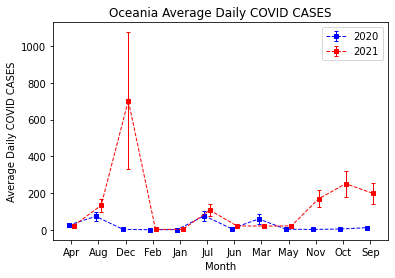

In [133]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errC20, data=statsC20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errC21, data=statsC21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Oceania Average Daily COVID CASES")
plt.show()

The line graph above is the average daily covid cases between 2020 and 2021 with error bars. The graph shows that Oceania barely suffered from Covid 19 in 2020 and in 2021 because the reported cases are really few compared to other continents. There is an error bar that is very long and this shows that it is not that reliable because it does not match the data. 

**No.2 North America**

In [147]:
statsC221=contcases[(contcases['continent']=='North America(continent)')
  & (contcases['year']==2021)]
statsC221

continent 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub6 
 ci_lb6 
 
 
 
 
 83 
 North America(continent) 
 2021 
 Apr 
 3474.511594 
 13109.117751 
 690 
 4454.363816 
 2494.659372 
 
 
 84 
 North America(continent) 
 2021 
 Aug 
 7564.781206 
 31441.137078 
 713 
 9876.529020 
 5253.033392 
 
 
 85 
 North America(continent) 
 2021 
 Dec 
 9583.346424 
 50657.183656 
 713 
 13307.977415 
 5858.715432 
 
 
 86 
 North America(continent) 
 2021 
 Feb 
 4435.069876 
 18203.779489 
 644 
 5843.661074 
 3026.478677 
 
 
 87 
 North America(continent) 
 2021 
 Jan 
 9823.566620 
 41609.030320 
 713 
 12882.921141 
 6764.212099 
 
 
 88 
 North America(continent) 
 2021 
 Jul 
 2912.256662 
 11901.748323 
 713 
 3787.347172 
 2037.166152 
 
 
 89 
 North America(continent) 
 2021 
 Jun 
 1128.489855 
 2985.964804 
 690 
 1351.678349 
 905.301361 
 
 
 90 
 North America(continent) 
 2021 
 Mar 
 3105.723703 
 12114.880329 
 713 
 3996.485002 
 2214.962403 
 
 
 91 
 North America(continent) 
 2021 
 May 
 1919.178121 
 6530.713898 
 713 
 2399.356797 
 1438.999445 
 
 
 92 
 North America(continent) 
 2021 
 Nov 
 4070.542029 
 19237.894355 
 690 
 5508.494902 
 2632.589156 
 
 
 93 
 North America(continent) 
 2021 
 Oct 
 4170.751753 
 18095.115446 
 713 
 5501.217107 
 2840.286399 
 
 
 94 
 North America(continent) 
 2021 
 Sep 
 7353.733333 
 30881.235514 
 690 
 9661.977703 
 5045.488964

In [148]:
statsC220=contcases[(contcases['continent']=='North America(continent)')
  & (contcases['year']==2020)]
statsC220

continent 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 ci_ub6 
 ci_lb6 
 
 
 
 
 71 
 North America(continent) 
 2020 
 Apr 
 1395.597101 
 6024.659889 
 690 
 1845.915459 
 945.278744 
 
 
 72 
 North America(continent) 
 2020 
 Aug 
 2558.939691 
 10048.562353 
 713 
 3297.772450 
 1820.106933 
 
 
 73 
 North America(continent) 
 2020 
 Dec 
 10196.102384 
 43624.334013 
 713 
 13403.634559 
 6988.570210 
 
 
 74 
 North America(continent) 
 2020 
 Feb 
 0.833333 
 1.542249 
 60 
 1.231738 
 0.434928 
 
 
 75 
 North America(continent) 
 2020 
 Jan 
 0.631579 
 0.895081 
 19 
 1.062994 
 0.200164 
 
 
 76 
 North America(continent) 
 2020 
 Jul 
 3172.765778 
 12561.816835 
 713 
 4096.388627 
 2249.142929 
 
 
 77 
 North America(continent) 
 2020 
 Jun 
 1566.520290 
 6157.750470 
 690 
 2026.786617 
 1106.253963 
 
 
 78 
 North America(continent) 
 2020 
 Mar 
 481.909302 
 2681.486820 
 430 
 736.074746 
 227.743859 
 
 
 79 
 North America(continent) 
 2020 
 May 
 1192.165498 
 4737.096601 
 713 
 1540.466282 
 843.864713 
 
 
 80 
 North America(continent) 
 2020 
 Nov 
 7133.234783 
 31079.078406 
 690 
 9456.267088 
 4810.202477 
 
 
 81 
 North America(continent) 
 2020 
 Oct 
 3220.123422 
 13059.619589 
 713 
 4180.347824 
 2259.899021 
 
 
 82 
 North America(continent) 
 2020 
 Sep 
 2166.363768 
 8222.473043 
 690 
 2780.959551 
 1551.767986

In [149]:
statsC220.columns=['continent','year','month','mean','std','size','ci_lb6','ci_ub6']

In [150]:
statsC221.columns=['continent','year','month','mean','std','size','ci_lb6','ci_ub6']

In [151]:
x=statsC220['continent']
x

In [152]:
y1=statsC220['mean']
y1

In [153]:
y2=statsC221['mean']
y2

In [154]:
ci_lb_ubC220=[statsC220['ci_lb6'],statsC220['ci_ub6']]
errC220 = np.abs(ci_lb_ubC220 - statsC220['mean'].to_numpy())

In [155]:
ci_lb_ubC221=[statsC221['ci_lb6'],statsC221['ci_ub6']]
errC221 = np.abs(ci_lb_ubC221 - statsC221['mean'].to_numpy())

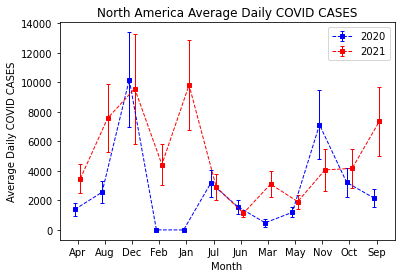

In [156]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errC220, data=statsC220,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errC221, data=statsC221,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("North America Average Daily COVID CASES")
plt.show()

The line graph above is the average daily covid cases between 2020 and 2021 with error bars. The graph shows that North America r suffered from Covid 19 in 2020 and in 2021 equally because the numbers are near each other. There is are some error bar that are  longer than others which show that these points are not as reliabe as the others. 

**Conclusion**

The country that was taken as an example was France and the graphs and analysis show that it really suffered from covid 19 either in terms of confirmed cases or confirmed deaths. The data shows that France suffered from very high death cases rate and that most of the deaths happened in 2021. 

For the continent comparison, the expected result happened which is that Europe and Central Asia are the ones who suffered more than East Asia and Pacific. This is because countries that mostly suffered from covid 19 such as France lies in the Europe and Central Asia sector. In general, for 2020 and 2021 countries of East Asia and Pacific suffered less confirmed cases and confirmed deaths than Europe and Central Asia. 

For the income level comparison, something unexpected happened which is that the data shows that high income people suffered from covid 19 more than low income people but this does not make sense. This happened because the data did not give the necessary information about low income people in order to draw a suitable conclusion. This is because the sample size of low income people is very low compared to high income people which makes it seem that high income people suffered more. 

For the region comparison, the graphs show that North America suffered more in terms of covid 19 confirmed cases and confirmed deaths than Oceania. This makes sense because the population size in North America is definitely much higher than in Oceania. Countries that lie in North America is the United States of America and Canada which have very big populations. But, countries in Oceania are New Zealand and Australia which have way more less population sizes than countries in North America. 
